# General Overview - Data Wrangling

The dataset represents 10 years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. It includes over 50 features representing patient and hospital outcomes. Information was extracted from the database for encounters that satisfied the following criteria.

- It is an inpatient encounter (a hospital admission).
- It is a diabetic encounter, that is, one during which any kind of diabetes was entered to the system as a diagnosis.
- The length of stay was at least 1 day and at most 14 days.
- Laboratory tests were performed during the encounter.
- Medications were administered during the encounter.

The data contains such attributes as patient number, race, gender, age, admission type, time in hospital, medical specialty of admitting physician, number of lab test performed, HbA1c test result, diagnosis, number of medication, diabetic medications, number of outpatient, inpatient, and emergency visits in the year before the hospitalization, etc.*

*Taken from [UC Irvine's Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='darkgrid')
%matplotlib inline

/Users/annatang/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv('diabetic_data.csv', na_values=["?"], low_memory=False) # import data
# csv contains "?" for missing values

diabetes = data.copy() # save a copy as diabetes

In [3]:
diabetes.head(10)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),NaN,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),NaN,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),NaN,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),NaN,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),NaN,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    3197 non-null    object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                61510 non-null   object
 11  medical_specialty         51817 non-null   object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

It looks like there is a good mix of numerical and categorical variables.

# column descriptions and values

Below is a list of all columns, their data type, description, and possible values. The table is from the research article [Impact of HbA1c Measurement on Hospital Readmission Rates: Analysis of 70,000 Clinical Database Patient Records](https://www.hindawi.com/journals/bmri/2014/781670/tab1/).

| Feature name | Type | Description | Values |
|-------------|------|------------------------|----------|
| Encounter ID | Numeric | Unique identifier of an encounter |
| Patient number | Numeric | Unique identifier of a patient |
| Race | Nominal | | Caucasian, Asian, African American, Hispanic, and other |
| Gender | Nominal | | male, female, and unknown/invalid |
| Age | Nominal | Grouped in 10-year intervals |
| Weight | Numeric | Weight in pounds |
| Admission type | Nominal | Integer identifier corresponding to 9 distinct values | For example: emergency, urgent, elective, newborn, and not available |
| Discharge disposition | Nominal | Integer identifier corresponding to 29 distinct values | For example: discharged to home, expired, and not available |
| Admission source | Nominal | Integer identifier corresponding to 21 distinct values | For example: physician referral, emergency room, and transfer from a hospital |
| Time in hospital | Numeric | Integer number of days between admission and discharge |
| Payer code | Nominal | Integer identifier corresponding to 23 distinct values | For example: Blue Cross/Blue Shield, Medicare, and self-pay |
| Medical specialty | Nominal | Integer identifier of a specialty of the admitting physician, corresponding to 84 distinct values | For example: cardiology, internal medicine, family/general practice, and surgeon |
| Number of lab procedures | Numeric | Number of lab tests performed during the encounter |
| Number of procedures | Numeric | Number of procedures (other than lab tests) performed during the encounter |
| Number of medications | Numeric | Number of distinct generic names administered during the encounter |
| Number of outpatient visits | Numeric | Number of outpatient visits of the patient in the year preceding the encounter |
| Number of emergency visits | Numeric | Number of emergency visits of the patient in the year preceding the encounter |
| Number of inpatient visits | Numeric | Number of inpatient visits of the patient in the year preceding the encounter |
| Diagnosis 1 | Nominal | The primary diagnosis (coded as first three digits of ICD9) | 848 distinct values |
| Diagnosis 2 | Nominal | Secondary diagnosis (coded as first three digits of ICD9) | 923 distinct values |
| Diagnosis 3 | Nominal | Additional secondary diagnosis (coded as first three digits of ICD9) | 954 distinct values |
| Number of diagnoses | Numeric | Number of diagnoses entered to the system |
| Glucose serum test result | Nominal | Indicates the range of the result or if the test was not taken | ">200," ">300," "normal," and "none" if not measured |
| A1c test result | Nominal | Indicates the range of the result or if the test was not taken | ">8" if the result was greater than 8%, ">7" if the result was greater than 7% but less than 8%, "normal" if the result was less than 7%, and "none" if not measured |
| Change of medications | Nominal | Indicates if there was a change in diabetic medications (either dosage or generic name) | "change" and "no change" |
| Diabetes medications | Nominal | Indicates if there was any diabetic medication prescribed | "yes" and "no" |
| 24 features for medications | Nominal | For the generic names: metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, sitagliptin, insulin, glyburide-metformin, glipizide-metformin, glimepiride-pioglitazone, metformin-rosiglitazone, and metformin-pioglitazone, the feature indicates whether the drug was prescribed or there was a change in the dosage |  "up" if the dosage was increased during the encounter, "down" if the dosage was decreased, "steady" if the dosage did not change, and "no" if the drug was not prescribed |
| Readmitted | Nominal | Days to inpatient readmission |  "<30" if the patient was readmitted in less than 30 days, ">30" if the patient was readmitted in more than 30 days, and "No" for no record of readmission |

# duplicates

In [5]:
diabetes = diabetes.drop_duplicates() # based on encounter ID

diabetes.shape # no duplicates detected!

(101766, 50)

Some patients visited the hospital multiple times for treatment so to avoid over-representing any particular individual, only the first encounter with a patient will be used / kept in this dataset.

In [6]:
# total unique patients
len(diabetes.patient_nbr.value_counts())

71518

In [7]:
# locate number of patient visits using patient_id
diabetes.patient_nbr.value_counts()

88785891     40
43140906     28
23199021     23
1660293      23
88227540     23
             ..
71081460      1
30060018      1
67443444      1
141344240     1
93251151      1
Name: patient_nbr, Length: 71518, dtype: int64

In [8]:
# keep only one record for each patient, the first visit
diabetes = diabetes.drop_duplicates(['patient_nbr'], keep='first')

In [9]:
diabetes.shape

(71518, 50)

# dropping irrelevant columns

The majority of patients do not have a weight listed so this column can be dropped. Payer code and medical specialty are also missing for about half of all patients. We do not need to know how the patients paid for their treatments and we do not have enough information to figure out which medical unit they went to. Since each encounter is unique, the encounter ID is no longer needed.

In [10]:
# columns to drop
drop_cols = ['encounter_id', 'weight', 'payer_code']

diabetes = diabetes.drop(columns=drop_cols)

In [11]:
diabetes.columns # confirm drop

Index(['patient_nbr', 'race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'medical_specialty', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

# addressing NaN values and removing rows

The majority of columns are not missing any values. Only race, medical specialty, diagnosis 1, 2 and 3 contain missing values. Since there is no way to know the race of the patient using existing information, the best option is to remove the rows with a missing string for race.

In [12]:
diabetes.isnull().sum()

patient_nbr                     0
race                         1948
gender                          0
age                             0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
medical_specialty           34477
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         11
diag_2                        294
diag_3                       1225
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide                       0
tolbutamide   

In [13]:
# remove rows where race is null
diabetes = diabetes.dropna(axis=0, subset=['race'])

diabetes.shape

(69570, 47)

In [14]:
diabetes.isnull().sum()

patient_nbr                     0
race                            0
gender                          0
age                             0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
medical_specialty           33479
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         10
diag_2                        275
diag_3                       1158
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide                       0
tolbutamide   

For medical specialty, the NaN values can be replaced with unknown since a large portion of the patients do not have a listing.

In [15]:
diabetes.medical_specialty.value_counts(dropna=False)

NaN                       33479
InternalMedicine          10539
Family/GeneralPractice     4981
Emergency/Trauma           4443
Cardiology                 4169
                          ...  
SportsMedicine                1
Psychiatry-Addictive          1
Resident                      1
Speech                        1
Perinatology                  1
Name: medical_specialty, Length: 71, dtype: int64

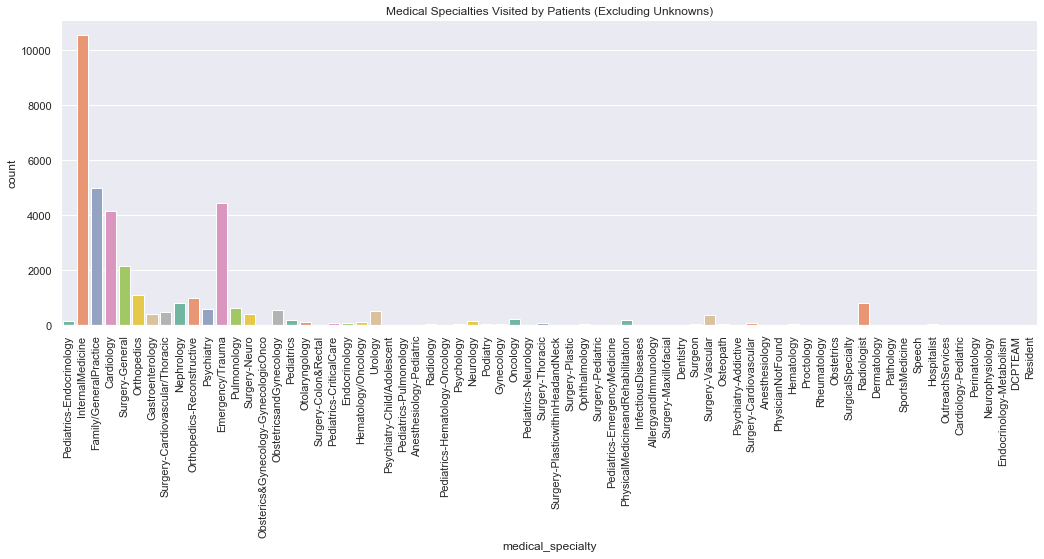

In [16]:
d = sns.catplot(x='medical_specialty', kind='count', palette='Set2', aspect=3, data=diabetes)
d.set_xticklabels(rotation=90)
plt.title('Medical Specialties Visited by Patients (Excluding Unknowns)')
plt.show()

In [17]:
# replace NaN with unknown in medical specialty
diabetes['medical_specialty'].fillna('Unknown', inplace=True)

Now, we are down to three columns with missing information: diagnosis 1, 2, and 3. Diagnosis 1 is described as the primary diagnosis made during the patient's visit while diagnosis 2 is the second and 3 is an any additional diagnoses made after that. Looking at the patients' rows that are missing a primary diagnosis, most of them have a second diagnosis or even a third. Since it doesn't make sense to have a second (or third) but not a primary diagnosis, we will remove these columns from the dataset.

The number of diagnoses column shows the total number of conditions a patient is diagnosed with. Only the first three are recorded, so those that are missing the first diagnosis but still a second or third are in error.

In [18]:
diabetes[['diag_1', 'diag_2', 'diag_3','number_diagnoses']][diabetes.diag_1.isnull()]

,diag_1,diag_2,diag_3,number_diagnoses
518,NaN,780,997,4
1267,NaN,250.82,401,5
1488,NaN,276,594,8
3197,NaN,250.01,428,7
37693,NaN,780,295,9
57058,NaN,V63,414,6
57737,NaN,276,V08,8
60314,NaN,427,486,8
86018,NaN,250.02,438,4
87181,NaN,NaN,NaN,5


In [19]:
# remove rows where diagnosis 1 is missing
diabetes = diabetes.dropna(axis=0, subset=['diag_1'])

diabetes.shape

(69560, 47)

In [20]:
diabetes = diabetes.reset_index(drop=True)

There are two remaining diagnosis columns with missing values. Each number correlates to a specific condition so if there is a missing value, then it is likely that the patient only has one diagnosed condition. The number of diagnoses column lists the total number of diagnosed conditions. When looking at all three diagnosis columns, if the number is one, then diagnosis 2 and 3 can be filled in with a 0 to show that there is no additional diagnosis. If diagnosis 2 or 3 is missing a value and the number of diagnoses is greater than one, then some diagnoses were not recorded and the rows should be removed.

In [21]:
diabetes[['diag_1', 'diag_2', 'diag_3']].isnull().sum()

diag_1       0
diag_2     274
diag_3    1157
dtype: int64

In [22]:
diabetes[['diag_1','diag_2', 'diag_3','number_diagnoses']][diabetes.diag_2.isnull() & (diabetes.number_diagnoses > 1)].sort_values(by=['number_diagnoses'])

,diag_1,diag_2,diag_3,number_diagnoses
19134,250.81,NaN,NaN,2
23118,250.82,NaN,NaN,3
25624,996,NaN,250,3
21402,864,NaN,959,3
23843,824,NaN,NaN,3
...,...,...,...,...
34628,486,NaN,428,8
35838,934,NaN,493,8
29646,576,NaN,276,8
15143,402,NaN,425,9


In [23]:
# remove rows where diagnosis 2 is missing and number of diagnoses is greater than 1
diag_2 = diabetes[(diabetes.diag_2.isnull()) & (diabetes.number_diagnoses > 1)].index
 
diabetes.drop(diag_2, inplace=True)

In [24]:
# remaining rows with missing diagnosis 2 should all have one diagnosed condition
diabetes[['diag_1','diag_2', 'diag_3','number_diagnoses']][diabetes.diag_2.isnull()].sort_values(by=['number_diagnoses'])

,diag_1,diag_2,diag_3,number_diagnoses
0,250.83,NaN,NaN,1
17404,250.11,NaN,NaN,1
17489,250.01,NaN,NaN,1
18030,250.12,NaN,NaN,1
18142,250,NaN,NaN,1
...,...,...,...,...
9450,250.01,NaN,NaN,1
9494,250.03,NaN,NaN,1
9800,250.13,NaN,NaN,1
8654,250.13,NaN,NaN,1


In [25]:
diabetes[['diag_1','diag_2', 'diag_3']].isnull().sum()

diag_1       0
diag_2     188
diag_3    1116
dtype: int64

Diagnosis 3 is the last column left with unaccounted missing values. Since some patients have 1 or 2 diagnosed conditions, the diagnosis 3 column is left intentionally blank. The goal here is to remove the rows that have a diagnoses number greater than two.

In [26]:
# list of affected rows
diabetes[['diag_1','diag_2', 'diag_3', 'number_diagnoses']][diabetes.diag_3.isnull() & (diabetes.number_diagnoses > 2)].sort_values(by='number_diagnoses')

,diag_1,diag_2,diag_3,number_diagnoses
318,722,729,NaN,3
61303,820,250.02,NaN,3
54161,486,250.81,NaN,3
40700,496,250,NaN,3
21114,922,427,NaN,3
...,...,...,...,...
65481,780,293,NaN,8
67219,574,552,NaN,8
67126,433,599,NaN,8
69454,590,276,NaN,8


In [27]:
# remove rows with missing diagnosis 3 and number of diagnoses is greater than 2
diag_3 = diabetes[(diabetes.diag_3.isnull()) & (diabetes.number_diagnoses > 2)].index
 
diabetes.drop(diag_3, inplace=True)

In [28]:
# remaining rows with missing diagnosis 3
diabetes[['diag_1','diag_2', 'diag_3','number_diagnoses']][diabetes.diag_3.isnull()].sort_values(by=['number_diagnoses'])

,diag_1,diag_2,diag_3,number_diagnoses
0,250.83,NaN,NaN,1
12151,250.13,NaN,NaN,1
12091,250.03,NaN,NaN,1
12031,250.83,NaN,NaN,1
11941,250.12,NaN,NaN,1
...,...,...,...,...
13926,311,250,NaN,2
13955,432,250,NaN,2
14005,786,250,NaN,2
14093,648,250.02,NaN,2


In [29]:
diabetes.isnull().sum()

patient_nbr                    0
race                           0
gender                         0
age                            0
admission_type_id              0
discharge_disposition_id       0
admission_source_id            0
time_in_hospital               0
medical_specialty              0
num_lab_procedures             0
num_procedures                 0
num_medications                0
number_outpatient              0
number_emergency               0
number_inpatient               0
diag_1                         0
diag_2                       188
diag_3                      1031
number_diagnoses               0
max_glu_serum                  0
A1Cresult                      0
metformin                      0
repaglinide                    0
nateglinide                    0
chlorpropamide                 0
glimepiride                    0
acetohexamide                  0
glipizide                      0
glyburide                      0
tolbutamide                    0
pioglitazo

In [30]:
# replace NaN with None in diagnosis 2 and 3 to show there is no additional diagnosis
diabetes.fillna('None', inplace=True)

In [31]:
# confirm there are no more NaN values
diabetes.isnull().sum()

patient_nbr                 0
race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol  

# grouping diagnosis codes

The diagnosis 1, 2, and 3 columns contain codes for the types of conditions patients are diagnosed with. There are almost 700 unique codes throughout this dataset so for the sake of brevity, we are grouping the codes together and assigning a categorical variable in place of a numeric value. The grouping is based on the [research paper table](https://www.hindawi.com/journals/bmri/2014/781670/tab2/) written by the providers of the dataset.

| Codes | Description | Group Name |
|-------|-------------|-----------|
| 390–459, 785 | Diseases of the circulatory system | Circulatory |
| 460–519, 786 | Diseases of the respiratory system | Respiratory |
| 520–579, 787 | Diseases of the digestive system | Digestive |
| 250.xx | Diabetes mellitus | Diabetes |
| 800–999 | Injury and poisoning | Injury |
| 710–739 | Diseases of the musculoskeletal system and connective tissue | Musculoskeletal |
| 580–629, 788 | Diseases of the genitourinary system | Genitourinary |
| 140–239 | Neoplasms | Neoplasms |
| 780, 781, 784, 790–799,<br>240–279, without 250, 680–709, 782, <br>001–139, 290–319, <br>E–V, 280–289, 320–359, <br>630–679, 360–389, 740–759 | Other symptoms, signs, and ill-defined conditions <br>Endocrine, nutritional, and metabolic diseases and immunity disorders, without diabetes<br>Diseases of the skin and subcutaneous tissue<br>Infectious and parasitic diseases<br>Mental disorders<br>External causes of injury and supplemental classification<br>Diseases of the blood and blood-forming organs<br>Diseases of the nervous system<br>Complications of pregnancy, childbirth, and the puerperium<br>Diseases of the sense organs<br>Congenital anomalies | Other |

In [32]:
# codes that start with E or V will be converted to Other
diabetes = diabetes.reset_index(drop=True)

In [33]:
evs = [] # diag_1

for x in diabetes.diag_1:
    if (x.startswith('E') or x.startswith('V')):
        if x not in evs:
            evs.append(x)

print(evs)

evs2 = [] # diag_2

for x in diabetes.diag_2:
    if (x.startswith('E') or x.startswith('V')):
        if x not in evs2:
            evs2.append(x)

print(evs2)

evs3 = [] # diag_3

for x in diabetes.diag_3:
    if (x.startswith('E') or x.startswith('V')):
        if x not in evs3:
            evs3.append(x)

print(evs3)

['V57', 'V55', 'V53', 'V58', 'V45', 'V26', 'V71', 'V56', 'V67', 'V60', 'V54', 'V43', 'V63', 'V25', 'V70', 'E909', 'V66', 'V51']
['V45', 'V15', 'V10', 'V42', 'E878', 'V44', 'V65', 'V12', 'E812', 'E932', 'V57', 'E888', 'E939', 'V43', 'E937', 'E944', 'E870', 'E849', 'V23', 'E950', 'E934', 'E915', 'V17', 'V72', 'E885', 'V58', 'E880', 'E879', 'V49', 'E890', 'V18', 'E817', 'V14', 'V66', 'E931', 'V46', 'E942', 'E947', 'V64', 'V08', 'E929', 'V53', 'E933', 'V62', 'E900', 'E936', 'V54', 'V09', 'E935', 'E884', 'E930', 'E928', 'E814', 'E927', 'E905', 'E917', 'E868', 'E854', 'V16', 'V70', 'E918', 'V13', 'E850', 'E881', 'V63', 'V61', 'E829', 'E919', 'E916', 'E858', 'V85', 'V02', 'E819', 'E826', 'E938', 'E816', 'E906', 'E818', 'E980', 'E924', 'V25', 'V11', 'V50', 'V03', 'E853', 'E968', 'E882', 'E821', 'V55', 'V86', 'E887', 'E883', 'V60']
['V27', 'V45', 'V43', 'V42', 'E888', 'V70', 'V10', 'V15', 'E932', 'E878', 'V11', 'E885', 'V14', 'E934', 'V58', 'E884', 'E933', 'E879', 'V17', 'V12', 'E935', 'V44', '

In [34]:
# replace EV values with Other
diabetes.loc[:,'diag_1'] = diabetes['diag_1'].replace(evs, 'Other')
diabetes.loc[:,'diag_2'] = diabetes['diag_2'].replace(evs2, 'Other')
diabetes.loc[:,'diag_3'] = diabetes['diag_3'].replace(evs3, 'Other')

diabetes[['diag_1', 'diag_2', 'diag_3']].head(10)

,diag_1,diag_2,diag_3
0,250.83,None,None
1,276,250.01,255
2,648,250,Other
3,8,250.43,403
4,197,157,250
5,414,411,250
6,414,411,Other
7,428,492,250
8,398,427,38
9,434,198,486


The codes for diabetes all start with 250 so we are replacing all strings that start with 250 with 250.

In [35]:
diabetes_code = [] # diag_1

for x in diabetes.diag_1:
    if x.startswith('250'):
        if x not in diabetes_code:
            diabetes_code.append(x)

print(diabetes_code)

diabetes_code2 = [] # diag_2

for x in diabetes.diag_2:
    if x.startswith('250'):
        if x not in diabetes_code2:
            diabetes_code2.append(x)

print(diabetes_code2)

diabetes_code3 = [] # diag_3

for x in diabetes.diag_3:
    if x.startswith('250'):
        if x not in diabetes_code3:
            diabetes_code3.append(x)

print(diabetes_code3)

['250.83', '250.7', '250.6', '250.4', '250.11', '250.32', '250.13', '250.03', '250.8', '250.02', '250.42', '250.41', '250.22', '250.82', '250.33', '250.12', '250.81', '250.93', '250', '250.01', '250.31', '250.43', '250.1', '250.2', '250.3', '250.23', '250.5', '250.92', '250.21', '250.9', '250.52', '250.51', '250.91', '250.53']
['250.01', '250', '250.43', '250.02', '250.03', '250.52', '250.6', '250.82', '250.51', '250.42', '250.41', '250.12', '250.53', '250.13', '250.93', '250.7', '250.83', '250.11', '250.5', '250.91', '250.92', '250.4', '250.23', '250.81', '250.22', '250.8', '250.9', '250.1', '250.33', '250.32', '250.2']
['250', '250.6', '250.01', '250.42', '250.41', '250.02', '250.8', '250.7', '250.52', '250.82', '250.03', '250.4', '250.51', '250.43', '250.92', '250.23', '250.53', '250.83', '250.5', '250.91', '250.12', '250.81', '250.9', '250.22', '250.93', '250.2', '250.1', '250.11', '250.13', '250.3', '250.21', '250.31']


In [36]:
# replace diabetes codes 250.xx with 250
diabetes.loc[:,'diag_1'] = diabetes['diag_1'].replace(diabetes_code, 'Diabetes')
diabetes.loc[:,'diag_2'] = diabetes['diag_2'].replace(diabetes_code2, 'Diabetes')
diabetes.loc[:,'diag_3'] = diabetes['diag_3'].replace(diabetes_code3, 'Diabetes')

diabetes[['diag_1', 'diag_2', 'diag_3']].head(10)

,diag_1,diag_2,diag_3
0,Diabetes,None,None
1,276,Diabetes,255
2,648,Diabetes,Other
3,8,Diabetes,403
4,197,157,Diabetes
5,414,411,Diabetes
6,414,411,Other
7,428,492,Diabetes
8,398,427,38
9,434,198,486


In [37]:
# 390–459, 785 - Circulatory
circ = ['785']

for x in range(390, 460):
    circ.append(str(x))
    
# 460–519, 786 - Respiratory
resp = ['786']

for x in range(460, 520):
    resp.append(str(x))
    
# 520–579, 787 - Digestive
dige = ['787']

for x in range(520, 580):
    dige.append(str(x))
    
# 800–999 - Injury
inj = []

for x in range(800, 1000):
    inj.append(str(x))
    
# 710–739 - Musculoskeletal
musc = []

for x in range(710, 740):
    musc.append(str(x))
    
# 580–629, 788 - Genitourinary
geni = ['788']

for x in range(580, 630):
    geni.append(str(x))

# 140–239 - Neoplasms
neop = []

for x in range(140, 240):
    neop.append(str(x))

In [38]:
# apply lists to dataset
codes = [circ, resp, dige, inj, musc, geni, neop]
conditions = ['Circulatory', 'Respiratory', 'Digestive', 'Injury', 'Musculoskeletal', 'Genitourinary', 'Neoplasms']

for x in range(0, 7):
    diabetes = diabetes.replace(codes[x], conditions[x])

In [39]:
diabetes[['diag_1', 'diag_2', 'diag_3']].head(10)

,diag_1,diag_2,diag_3
0,Diabetes,None,None
1,276,Diabetes,255
2,648,Diabetes,Other
3,8,Diabetes,Circulatory
4,Neoplasms,Neoplasms,Diabetes
5,Circulatory,Circulatory,Diabetes
6,Circulatory,Circulatory,Other
7,Circulatory,Respiratory,Diabetes
8,Circulatory,Circulatory,38
9,Circulatory,Neoplasms,Respiratory


In [40]:
# convert the rest to Other too
other = []

for x in range(1, 850):
    other.append(str(x))
    
diabetes = diabetes.replace(other, 'Other')

In [41]:
diabetes[['diag_1', 'diag_2', 'diag_3']].head(10)

,diag_1,diag_2,diag_3
0,Diabetes,None,None
1,Other,Diabetes,Other
2,Other,Diabetes,Other
3,Other,Diabetes,Circulatory
4,Neoplasms,Neoplasms,Diabetes
5,Circulatory,Circulatory,Diabetes
6,Circulatory,Circulatory,Other
7,Circulatory,Respiratory,Diabetes
8,Circulatory,Circulatory,Other
9,Circulatory,Neoplasms,Respiratory


In [42]:
diabetes.diag_1.unique()

array(['Diabetes', 'Other', 'Neoplasms', 'Circulatory', 'Respiratory',
       'Injury', 'Genitourinary', 'Musculoskeletal', 'Digestive'],
      dtype=object)

In [43]:
diabetes.diag_2.unique()

array(['None', 'Diabetes', 'Neoplasms', 'Circulatory', 'Respiratory',
       'Other', 'Injury', 'Musculoskeletal', 'Genitourinary', 'Digestive'],
      dtype=object)

In [44]:
diabetes.diag_3.unique() # need to add 365.44 to Other

array(['None', 'Other', 'Circulatory', 'Diabetes', 'Respiratory',
       'Injury', 'Neoplasms', 'Genitourinary', 'Digestive',
       'Musculoskeletal', '365.44'], dtype=object)

In [45]:
diabetes = diabetes.replace('365.44', 'Other')

In [46]:
diabetes.diag_3.unique()

array(['None', 'Other', 'Circulatory', 'Diabetes', 'Respiratory',
       'Injury', 'Neoplasms', 'Genitourinary', 'Digestive',
       'Musculoskeletal'], dtype=object)

# unique column values

Investigate the unique values of each column and look for error entries.

In [47]:
# display unique entries for each column
# count the unique values, equal to 1 means all values are the same
for x in diabetes.columns:
    print('Column Name: ' + x) 
    print('Unique Values: ', + len(diabetes[x].unique()))

Column Name: patient_nbr
Unique Values:  69389
Column Name: race
Unique Values:  5
Column Name: gender
Unique Values:  3
Column Name: age
Unique Values:  10
Column Name: admission_type_id
Unique Values:  8
Column Name: discharge_disposition_id
Unique Values:  26
Column Name: admission_source_id
Unique Values:  17
Column Name: time_in_hospital
Unique Values:  14
Column Name: medical_specialty
Unique Values:  71
Column Name: num_lab_procedures
Unique Values:  116
Column Name: num_procedures
Unique Values:  7
Column Name: num_medications
Unique Values:  75
Column Name: number_outpatient
Unique Values:  33
Column Name: number_emergency
Unique Values:  18
Column Name: number_inpatient
Unique Values:  13
Column Name: diag_1
Unique Values:  9
Column Name: diag_2
Unique Values:  10
Column Name: diag_3
Unique Values:  10
Column Name: number_diagnoses
Unique Values:  16
Column Name: max_glu_serum
Unique Values:  4
Column Name: A1Cresult
Unique Values:  4
Column Name: metformin
Unique Values:  4


In [48]:
# remove row where gender is Unknown/Invalid
gender = diabetes[diabetes.gender == 'Unknown/Invalid'].index

diabetes.drop(gender, inplace=True)

In [49]:
# confirm removal
diabetes.gender.value_counts()

Female    36946
Male      32442
Name: gender, dtype: int64

We can remove any columns with a consistent value: metformin-rosiglitazone, citoglipton, and examide. These medications were not prescribed.

In [50]:
# drop columns
meds = ['metformin-rosiglitazone', 'glimepiride-pioglitazone', 'citoglipton', 'examide']

diabetes = diabetes.drop(columns=meds, axis=1)

In [51]:
diabetes.shape

(69388, 43)

## readmitted

Patients readmitted to the hospital in less than 30 days or after 30 days can be combined since they both imply that patients returned to the hospital for additional care.

In [52]:
# replace >30 and <30 with YES
diabetes = diabetes.replace(['>30', '<30'], 'YES')

In [53]:
diabetes.head()

,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,...,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,metformin-pioglitazone,change,diabetesMed,readmitted
0,8222157,Caucasian,Female,[0-10),6,25,1,1,Pediatrics-Endocrinology,41,...,No,No,No,No,No,No,No,No,No,NO
1,55629189,Caucasian,Female,[10-20),1,1,7,3,Unknown,59,...,No,No,No,Up,No,No,No,Ch,Yes,YES
2,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,Unknown,11,...,No,No,No,No,No,No,No,No,Yes,NO
3,82442376,Caucasian,Male,[30-40),1,1,7,2,Unknown,44,...,No,No,No,Up,No,No,No,Ch,Yes,NO
4,42519267,Caucasian,Male,[40-50),1,1,7,1,Unknown,51,...,No,No,No,Steady,No,No,No,Ch,Yes,NO


## Admission Type ID

The ID mapping documents matches each number with an admission condition. We are creating a new categorical column that reflects the ID number description to replace the current column. IDs 5, 6, and 8 represent some form of missing data so they will be grouped together into an Unknown category.

| admission_type_id	| description |
|-------------------|-------------|
| 1	| Emergency |
| 2	| Urgent |
| 3	| Elective |
| 4	| Newborn |
| 5	| Not Available |
| 6	| NULL |
| 7	| Trauma Center |
| 8	| Not Mapped |

In [54]:
pd.crosstab(diabetes.readmitted, diabetes.admission_type_id, margins=True, margins_name='Total')

admission_type_id,1,2,3,4,5,6,7,8,Total
readmitted,,,,,,,,,
NO,21099,7304,8786,6,1833,2233,20,199,41480
YES,14380,5073,4786,3,1289,2288,0,89,27908
Total,35479,12377,13572,9,3122,4521,20,288,69388


In [55]:
# create new column, admission_type, to replace admission_type_id
def admission(row):
    if row['admission_type_id'] == 1:
        return 'Emergency'
    if row['admission_type_id'] == 2:
        return 'Urgent'
    if row['admission_type_id'] == 3:
        return 'Elective'
    if row['admission_type_id'] == 4:
        return 'Newborn'
    if row['admission_type_id'] == 5:
        return 'Unknown'
    if row['admission_type_id'] == 6:
        return 'Unknown'
    if row['admission_type_id'] == 7:
        return 'Trauma Center'
    if row['admission_type_id'] == 8:
        return 'Unknown'

In [56]:
# create new column and apply function
diabetes['admission_type'] = diabetes.apply(lambda row: admission(row), axis=1)

In [57]:
diabetes[['admission_type_id', 'admission_type']] # confirmed!

,admission_type_id,admission_type
0,6,Unknown
1,1,Emergency
2,1,Emergency
3,1,Emergency
4,1,Emergency
...,...,...
69384,1,Emergency
69385,1,Emergency
69386,1,Emergency
69387,1,Emergency


In [58]:
# drop original admission_type_id column
diabetes = diabetes.drop(['admission_type_id'], axis=1)

## Discharge Disposition

The discharge disposition tells us what happened to a patient after they left the hospital. Each number correlates to a specific outcome. We are removing all rows where patients have some form of 'expired' or 'hospice' listed as their discharge since those patients passed and are not going to be readmitted or they are terminally ill.

| discharge_disposition_id | description |
|--------------------------|-------------|
| 1 | Discharged to home |
| 2	| Discharged/transferred to another short term hospital |
| 3	| Discharged/transferred to SNF |
| 4	| Discharged/transferred to ICF |
| 5	| Discharged/transferred to another type of inpatient care institution |
| 6	| Discharged/transferred to home with home health service |
| 7	| Left AMA |
| 8 | Discharged/transferred to home under care of Home IV provider |
| 9 | Admitted as an inpatient to this hospital |
| 10 | Neonate discharged to another hospital for neonatal aftercare |
| 11 | Expired |
| 12 | Still patient or expected to return for outpatient services |
| 13 | Hospice / home |
| 14 | Hospice / medical facility |
| 15 | Discharged/transferred within this institution to Medicare approved swing bed |
| 16 | Discharged/transferred/referred another institution for outpatient services |
| 17 | Discharged/transferred/referred to this institution for outpatient services |
| 18 | NULL |
| 19 | Expired at home. Medicaid only, hospice |
| 20 | Expired in a medical facility. Medicaid only, hospice |
| 21 | Expired, place unknown. Medicaid only, hospice |
| 22 | Discharged/transferred to another rehab facility including rehab units of a hospital |
| 23 | Discharged/transferred to a long term care hospital |
| 24 | Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare |
| 25 | Not Mapped |
| 30 | Discharged/transferred to another type of health care institution not defined elsewhere |
| 27 | Discharged/transferred to a federal health care facility |
| 28 | Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital |
| 29 | Discharged/transferred to a Critical Access Hospital (CAH) |

In [59]:
# expired - remove rows with discharge disposition IDs of 11, 19, 20, 21
discharge = diabetes[(diabetes.discharge_disposition_id == 11) | (diabetes.discharge_disposition_id == 19)].index
 
diabetes.drop(discharge, inplace=True)

In [60]:
# expired - remove rows with discharge disposition IDs of 20, 21
discharge = diabetes[(diabetes.discharge_disposition_id == 20) | (diabetes.discharge_disposition_id == 21)].index
 
diabetes.drop(discharge, inplace=True)

In [61]:
# hospice care - remove rows with discharge disposition IDs of 13, 14
discharge = diabetes[(diabetes.discharge_disposition_id == 13) | (diabetes.discharge_disposition_id == 14)].index
 
diabetes.drop(discharge, inplace=True)

In [62]:
pd.crosstab(diabetes.discharge_disposition_id, diabetes.readmitted, margins=True, margins_name='Total')

readmitted,NO,YES,Total
discharge_disposition_id,,,
1,26113,16794,42907
2,842,636,1478
3,4686,3806,8492
4,286,210,496
5,457,418,875
6,4284,3818,8102
7,247,151,398
8,41,31,72
9,6,3,9


Disposition IDs 18 and 25 are unknown so their IDs will be [replaced](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html) with 0 to show that there is no account of what happened to the patient after their discharge.

In [63]:
# replace with 0
diabetes['discharge_disposition_id'] = diabetes['discharge_disposition_id'].replace({18: 0, 25: 0})

In [64]:
# pd.crosstab(diabetes.discharge_disposition_id, diabetes.readmitted, margins=True, margins_name='Total')

Patients either went home after being discharged or they were moved to another health care facility for additional care. We can group them into three categories: home, hospital, and unknown depending on their outcome ID.

In [65]:
# Home: 1, 6, 8
diabetes['discharge_disposition_id'] = diabetes['discharge_disposition_id'].replace({1: 'Home', 6: 'Home', 8: 'Home'})

# Hospital: 2, 3, 4, 5, 7, 9, 10, 12, 15, 16, 17, 22, 23, 24, 27, 28
diabetes['discharge_disposition_id'] = diabetes['discharge_disposition_id'].replace([2, 3, 4, 5, 7, 9, 10, 12, 15, 16, 17, 22, 23, 24, 27, 28], 'Hospital')

# Unknown: 0
diabetes['discharge_disposition_id'] = diabetes['discharge_disposition_id'].replace(0, 'Unknown')

In [66]:
diabetes['discharge_disposition_id'].value_counts()

Home        51081
Hospital    13576
Unknown      3217
Name: discharge_disposition_id, dtype: int64

## Admission Source

The admission sources states where each patient came from. Some IDs mention that the information is not available: IDs 9, 17, and 20. These values will be replaced with 0 to represent Unknown.

| admission_source_id | description |
|---------------------|-------------|
| 1 | Physician Referral |
| 2 | Clinic Referral |
| 3 | HMO Referral |
| 4 | Transfer from a hospital |
| 5 | Transfer from a Skilled Nursing Facility (SNF) |
| 6 | Transfer from another health care facility |
| 7 | Emergency Room |
| 8 | Court/Law Enforcement |
| 9 | Not Available |
| 10 | Transfer from critical access hospital |
| 11 | Normal Delivery |
| 12 | Premature Delivery |
| 13 | Sick Baby |
| 14 | Extramural Birth |
| 17 | NULL |
| 18 | Transfer From Another Home Health Agency |
| 19 | Readmission to Same Home Health Agency |
| 20 | Not Mapped |
| 22 | Transfer from hospital inpt/same fac reslt in a sep claim |
| 23 | Born inside this hospital |
| 24 | Born outside this hospital |
| 25 | Transfer from Ambulatory Surgery Center |

In [67]:
pd.crosstab(diabetes.readmitted, diabetes.admission_source_id, margins=True, margins_name='Total')

admission_source_id,1,2,3,4,5,6,7,8,9,10,11,13,14,17,20,22,25,Total
readmitted,,,,,,,,,,,,,,,,,,
NO,12934,547,77,1668,313,1107,20621,9,28,4,1,1,2,2627,55,4,2,40000
YES,8116,303,58,691,191,383,15907,2,8,2,0,0,0,2116,97,0,0,27874
Total,21050,850,135,2359,504,1490,36528,11,36,6,1,1,2,4743,152,4,2,67874


In [68]:
# replace 9, 15, 17, 20, and 21 with 0
diabetes['admission_source_id'] = diabetes['admission_source_id'].replace([9, 17, 20], 0)

In [69]:
pd.crosstab(diabetes.readmitted, diabetes.admission_source_id, margins=True, margins_name='Total')

admission_source_id,0,1,2,3,4,5,6,7,8,10,11,13,14,22,25,Total
readmitted,,,,,,,,,,,,,,,,
NO,2710,12934,547,77,1668,313,1107,20621,9,4,1,1,2,4,2,40000
YES,2221,8116,303,58,691,191,383,15907,2,2,0,0,0,0,0,27874
Total,4931,21050,850,135,2359,504,1490,36528,11,6,1,1,2,4,2,67874


# clean data conclusion

In [70]:
diabetes = diabetes.reset_index(drop=True)

In [71]:
diabetes

,patient_nbr,race,gender,age,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,...,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,metformin-pioglitazone,change,diabetesMed,readmitted,admission_type
0,8222157,Caucasian,Female,[0-10),Unknown,1,1,Pediatrics-Endocrinology,41,0,...,No,No,No,No,No,No,No,No,NO,Unknown
1,55629189,Caucasian,Female,[10-20),Home,7,3,Unknown,59,0,...,No,No,Up,No,No,No,Ch,Yes,YES,Emergency
2,86047875,AfricanAmerican,Female,[20-30),Home,7,2,Unknown,11,5,...,No,No,No,No,No,No,No,Yes,NO,Emergency
3,82442376,Caucasian,Male,[30-40),Home,7,2,Unknown,44,1,...,No,No,Up,No,No,No,Ch,Yes,NO,Emergency
4,42519267,Caucasian,Male,[40-50),Home,7,1,Unknown,51,0,...,No,No,Steady,No,No,No,Ch,Yes,NO,Emergency
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67869,183087545,Caucasian,Female,[70-80),Home,7,9,Unknown,50,2,...,No,No,Steady,No,No,No,Ch,Yes,YES,Emergency
67870,188574944,Other,Female,[40-50),Home,7,14,Unknown,73,6,...,No,No,Up,No,No,No,Ch,Yes,YES,Emergency
67871,140199494,Other,Female,[60-70),Home,7,2,Unknown,46,6,...,No,No,Steady,No,No,No,No,Yes,YES,Emergency
67872,120975314,Caucasian,Female,[80-90),Home,7,5,Unknown,76,1,...,No,No,Up,No,No,No,Ch,Yes,NO,Emergency


# saving cleaned data

In [72]:
# save cleaned dataset to new file for storytelling and visualization
# diabetes.to_csv('diabetes_cleaned.csv')